#Laboratorio

#[EXTRA-PáGINA WEB DEL SERVICIO](https://pd-laboratorio.ue.r.appspot.com/)

#Datos del Estudiante

**Estudiante:** Cristino Pérez Ramos

**Carné:** 23003993

#Librerias Necesarias

Importar el Data Set Malaria

In [2]:
import tensorflow_datasets as tfds
import numpy as np
train_data = tfds.load(name="malaria", split=tfds.Split.TRAIN, as_supervised=True)



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteNWM2KC/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


#Visualizar las Imagenes

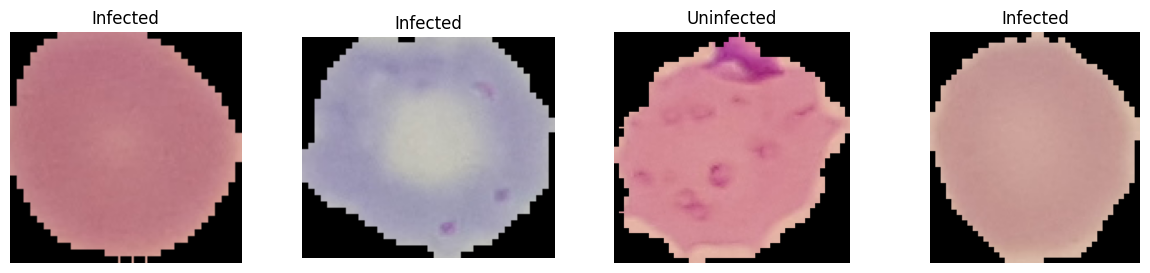

In [8]:

import matplotlib.pyplot as plt

images_to_display = 4
plt.figure(figsize=(15, 3))

for i, (image, label) in enumerate(train_data.take(images_to_display)):
    plt.subplot(1, images_to_display, i+1)
    plt.imshow(image)
    plt.title("Infected" if label else "Uninfected")
    plt.axis('off')

plt.show()


#Preprocesamiento de Datos

Pre-procesar el DataSet

In [ ]:
import tensorflow as tf

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, [64, 64])
    return image, label

train_data = train_data.map(preprocess)


Obtener los datasets de entrenamiento y prueba.

In [ ]:
train_size = int(0.75 * len(train_data))
val_size = int(0.25 * len(train_data))
train_dataset = train_data.take(train_size)
val_dataset = train_data.skip(train_size)

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

#El Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Compilar

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Entrenar
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
646/646 [==============================] - 169s 259ms/step - loss: 0.3878 - accuracy: 0.8179 - val_loss: 0.1972 - val_accuracy: 0.9248
Epoch 2/10
646/646 [==============================] - 167s 258ms/step - loss: 0.1912 - accuracy: 0.9303 - val_loss: 0.1849 - val_accuracy: 0.9329
Epoch 3/10
646/646 [==============================] - 166s 257ms/step - loss: 0.1639 - accuracy: 0.9432 - val_loss: 0.1900 - val_accuracy: 0.9338
Epoch 4/10
646/646 [==============================] - 152s 235ms/step - loss: 0.1404 - accuracy: 0.9527 - val_loss: 0.1626 - val_accuracy: 0.9428
Epoch 5/10
646/646 [==============================] - 149s 231ms/step - loss: 0.1184 - accuracy: 0.9604 - val_loss: 0.1608 - val_accuracy: 0.9463
Epoch 6/10
646/646 [==============================] - 148s 230ms/step - loss: 0.0949 - accuracy: 0.9675 - val_loss: 0.1743 - val_accuracy: 0.9425
Epoch 7/10
646/646 [==============================] - 163s 252ms/step - loss: 0.0752 - accuracy: 0.9743 - val_loss: 0.1915 -

#Guardar el Modelo

In [ ]:
model.save("miModelo.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Evaluar

In [ ]:
# Evaluar el modelo
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


216/216 [==============================] - 28s 72ms/step - loss: 0.3042 - accuracy: 0.9443
Validation Loss: 0.30418774485588074
Validation Accuracy: 0.9442670345306396


#Pruebas

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files

# Cargar el modelo
modelo = tf.keras.models.load_model('miModelo.h5')

# Subir y preprocesar la imagen
uploaded = files.upload()
img_path = next(iter(uploaded))
img = load_img(img_path, target_size=(64,64))
img_array = img_to_array(img) / 255.0
img_array = tf.expand_dims(img_array, axis=0)

# Hacer la predicción
prediccion = modelo.predict(img_array)
prediccion_label = "Infected" if prediccion[0][0] > 0.5 else "Uninfected"
print("Predicción:", prediccion_label)



Saving esOno.png to esOno (2).png
1/1 [==============================] - 0s 83ms/step
Predicción: Infected
